In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import os
import math

os.chdir('data')
sns.set_style('whitegrid')

In [2]:
# Load the RNA-seq differentially expressed genes data
datPD = pd.read_table('parkinsonDE.txt')

# Slice the data by the adjusted p-value
lowPVal = datPD[datPD['padj'] < 0.05]

# Load the MS3 Proteomics data
protDatPD = pd.read_table('protPDE.csv')

# Slice the data by the FDR q-value
lowQVal = protDatPD[protDatPD['qvalue'] < 0.05]

datPD.head()

,EnsemblID,symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,ENSG00000173110.6,HSPA6,1306.723881,1.831929,0.238948,7.666642,1.765574e-14,3.103879e-10
1,ENSG00000123689.5,G0S2,130.156793,1.506402,0.221366,6.805015,1.010386e-11,8.881295e-08
2,ENSG00000204389.7,HSPA1A,10801.717216,1.492569,0.226556,6.588079,4.455545e-11,2.610949e-07
3,ENSG00000106211.8,HSPB1,9679.155270,1.296490,0.206143,6.289276,3.189502e-10,1.401786e-06
4,ENSG00000137731.8,FXYD2,8.746807,0.979849,0.161285,6.075249,1.237955e-09,3.627207e-06


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


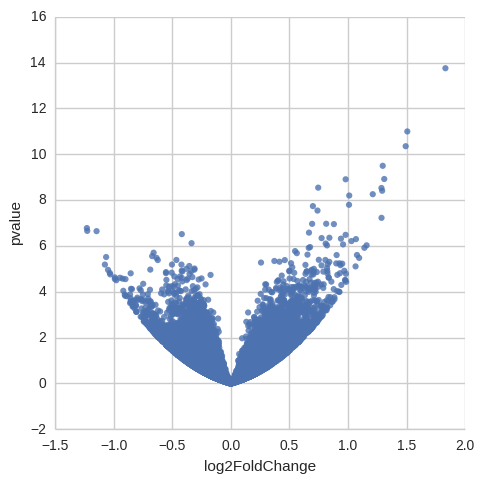

In [3]:
datPDVolData = datPD[['symbol', 'log2FoldChange', 'pvalue']]

datPDVolData['pvalue'] = [-(math.log(pvals, 10)) for pvals in datPDVolData['pvalue']]
sns.lmplot('log2FoldChange', 'pvalue', datPDVolData, fit_reg=False)